In [1]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
# Import the create_engine function from sqlalchemy.
# Rest of the code...
# Create Engine
engine = create_engine("sqlite:///combined_attacks.sqlite")
conn = engine.connect()

In [3]:
query = """SELECT * 
        FROM combined_attacks"""
df = pd.read_sql(query, conn)
df.head()

,case_number,date,year,attack_type,country,area,location,activity,name,sex,...,original_order,unnamed:_22,unnamed:_23,animal_type,count,latitude,longitude,details,month,day
0,2019.08.27,2019-08-27,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6452.0,None,None,shark,172.0,29.025813,-80.927127,None,NaN,NaN
1,2019.08.21,2019-08-21,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,6451.0,None,None,shark,6.0,26.122308,-80.143379,None,NaN,NaN
2,2019.08.20,2019-08-20,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,6450.0,None,None,shark,1.0,30.829423,-82.609586,None,NaN,NaN
3,2019.08.16,2019-08-16,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,6449.0,None,None,shark,172.0,29.025813,-80.927127,None,NaN,NaN
4,2019.08.11,2019-08-11,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,6448.0,None,None,shark,1.0,-12.206631,-77.014699,None,NaN,NaN


In [12]:
df.animal_type.unique()

array(['shark', 'bear'], dtype=object)

# Q1. Whether Attacks have increased/decreased over time?

## Shark Attacks

In [26]:
shark_df = df.loc[df['animal_type'] == 'shark']
shark_df.isna().sum()

case_number                  1
date                       211
year                       135
attack_type                  0
country                      0
area                         1
location                     0
activity                   128
name                        30
sex                          0
age                        729
injury                       5
fatal_(y/n)                197
time                       790
species                    887
investigator_or_source       6
pdf                          0
href_formula                 0
href                         0
case_number.1                0
case_number.2                0
original_order               0
unnamed:_22               2192
unnamed:_23               2192
animal_type                  0
count                        0
latitude                     0
longitude                    0
details                   2193
month                     2193
day                       2193
dtype: int64

In [27]:
shark_years = shark_df['year'].dropna()
shark_years = shark_years.astype(int)
shark_attacks_count = shark_years.value_counts().sort_index()
shark_attacks_count

1900     6
1901     1
1902     3
1903     2
1904     2
        ..
2015    72
2016    63
2017    61
2018    42
2019    40
Name: year, Length: 117, dtype: int64

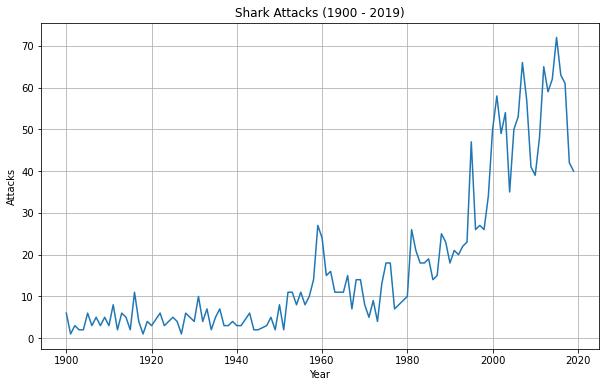

In [28]:
plt.figure(figsize = (10,6))
shark_attacks_count.plot(title = 'Shark Attacks (1900 - 2019)', xlabel = 'Year', ylabel = 'Attacks')

plt.grid()

## Bear Attacks

In [29]:
bear_df = df.loc[df['animal_type'] == 'bear']
bear_df.isna().sum()

case_number               136
date                        0
year                        0
attack_type               136
country                   136
area                      136
location                    0
activity                  136
name                        0
sex                         0
age                         3
injury                    136
fatal_(y/n)               136
time                      136
species                     0
investigator_or_source    136
pdf                       136
href_formula              136
href                      136
case_number.1             136
case_number.2             136
original_order            136
unnamed:_22               136
unnamed:_23               136
animal_type                 0
count                     136
latitude                    0
longitude                   0
details                     0
month                       0
day                         0
dtype: int64

In [30]:
bear_years = bear_df['year'].dropna()
bear_years = bear_years.astype(int)
bear_attacks_count = bear_years.value_counts().sort_index()
bear_attacks_count

1901    3
1906    1
1916    1
1922    1
1929    1
       ..
2015    2
2016    1
2017    2
2018    7
2019    2
Name: year, Length: 64, dtype: int64

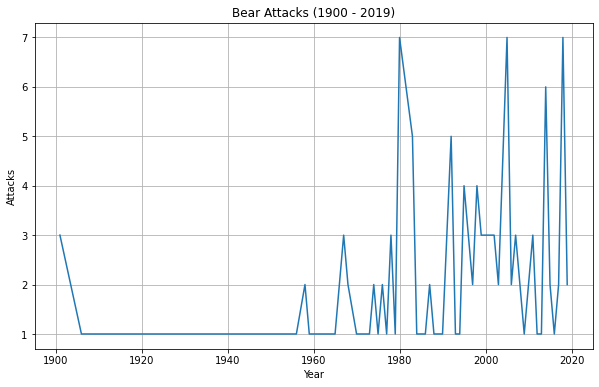

In [31]:
plt.figure(figsize = (10,6))
bear_attacks_count.plot(title = 'Bear Attacks (1900 - 2019)', xlabel = 'Year', ylabel = 'Attacks')

plt.grid()

# Q2. What are the main spots for the Attacks?

## Sharks

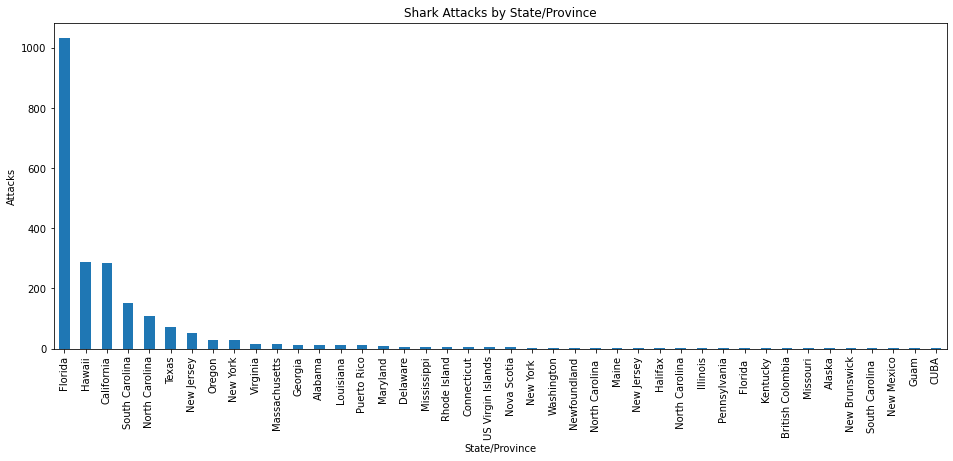

In [42]:
#country	area	location

shark_area_counts = shark_df['area'].value_counts()
plt.figure(figsize = (16,6))
shark_area_counts.plot(kind = 'bar', title = 'Shark Attacks by State/Province', xlabel = 'State/Province', ylabel = 'Attacks')
plt.show()


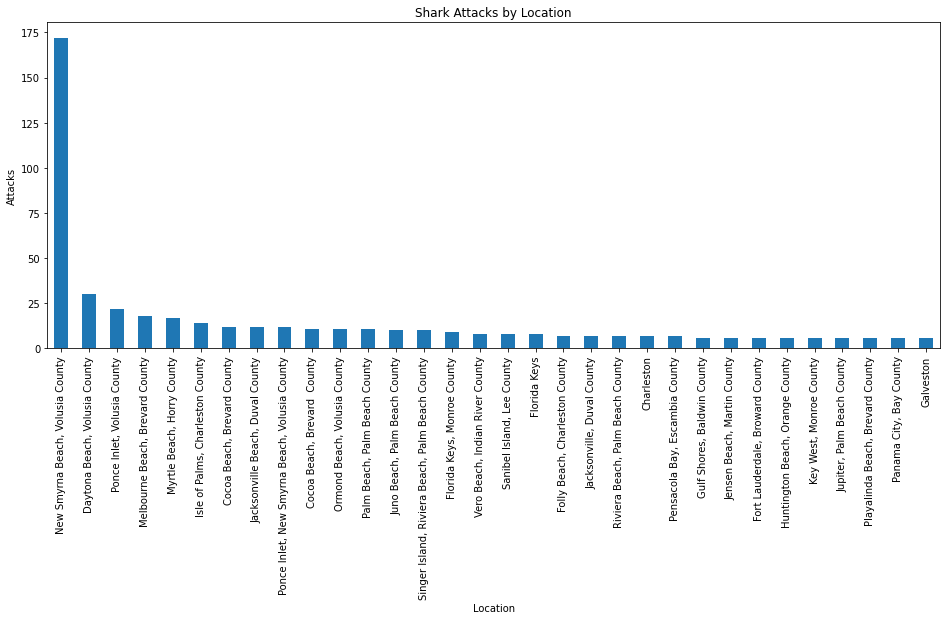

In [52]:
shark_location_counts = shark_df['location'].value_counts()

# shark_location_counts[shark_location_counts>5]
plt.figure(figsize = (16,6))
shark_location_counts[shark_location_counts>5].plot(kind = 'bar', title = 'Shark Attacks by Location', xlabel = 'Location', ylabel = 'Attacks')
plt.show()

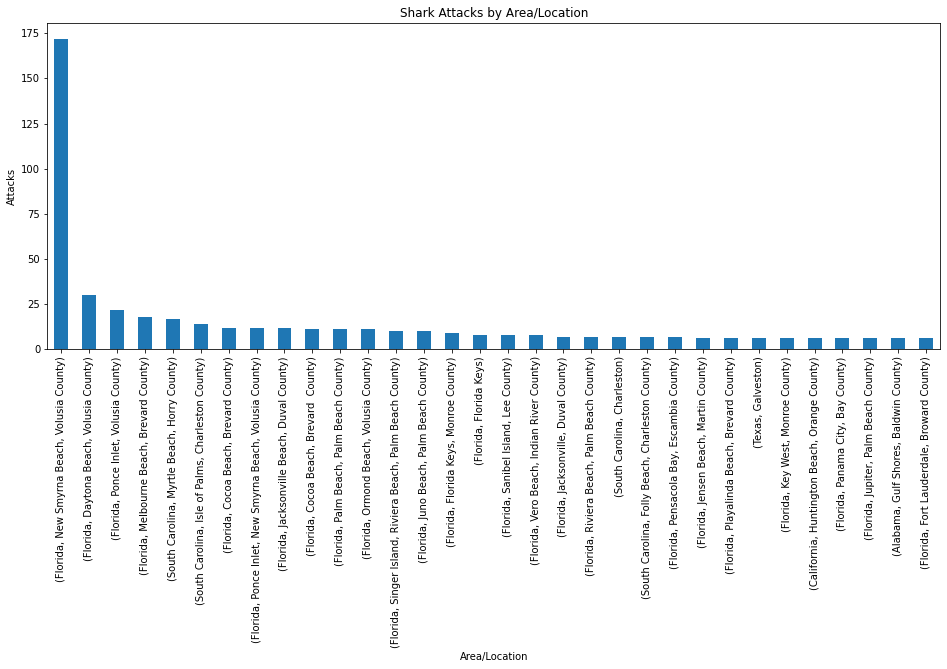

In [56]:
shark_area_location_counts = shark_df[['area', 'location']].value_counts()

plt.figure(figsize = (16,6))
shark_area_location_counts[shark_area_location_counts>5].plot(kind = 'bar', title = 'Shark Attacks by Area/Location', xlabel = 'Area/Location', ylabel = 'Attacks')
plt.show()



## Bears

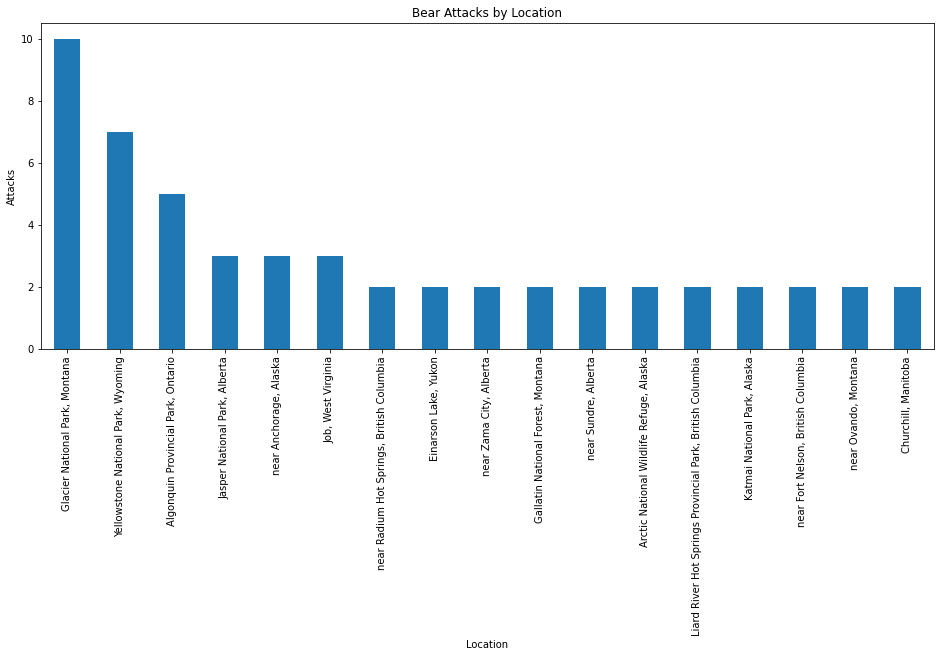

In [62]:
bear_location_counts = bear_df['location'].value_counts()


plt.figure(figsize = (16,6))
bear_location_counts[bear_location_counts>1].plot(kind = 'bar', title = 'Bear Attacks by Location', xlabel = 'Location', ylabel = 'Attacks')
plt.show()

In [65]:
#https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dv_project3")
location = geolocator.geocode("Panorama Mountain Resort, British Columbia")
print(location.address)

Panorama Mountain Resort, 2000, Panorama Mountain Village, Area F (Columbia Lake/Windermere Lake), Regional District of East Kootenay, British Columbia, V0A 1T0, Canada


In [66]:
print((location.latitude, location.longitude))

(50.441951149999994, -116.21242469895196)


# Q3. Map out where the most attacks happened?

In [ ]:
# Q4. Who are the typical victims in these attacks?

# What activity was the victim doing when they got attacked?

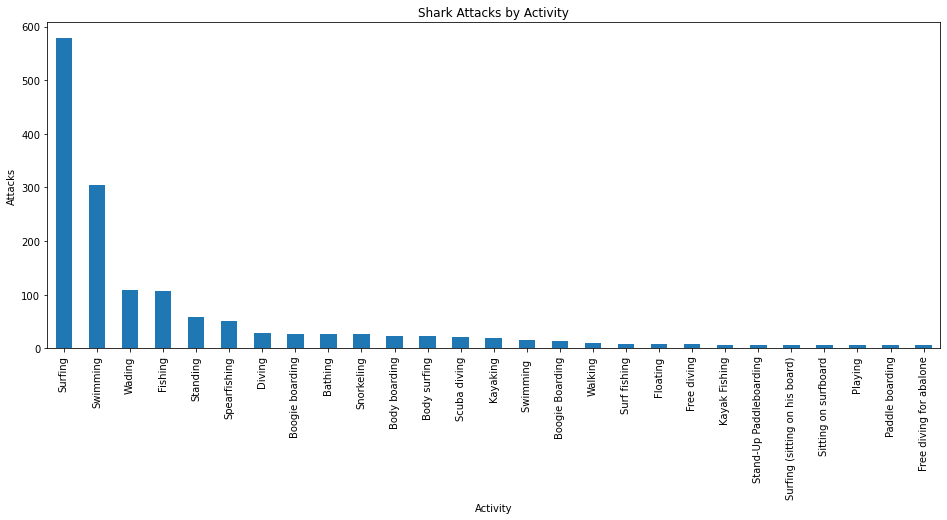

In [83]:

shark_activites = shark_df['activity'].value_counts()


plt.figure(figsize = (16,6))
shark_activites[shark_activites>5].plot(kind = 'bar', title = 'Shark Attacks by Activity', xlabel = 'Activity', ylabel = 'Attacks')
plt.show()



# Type of Injury?

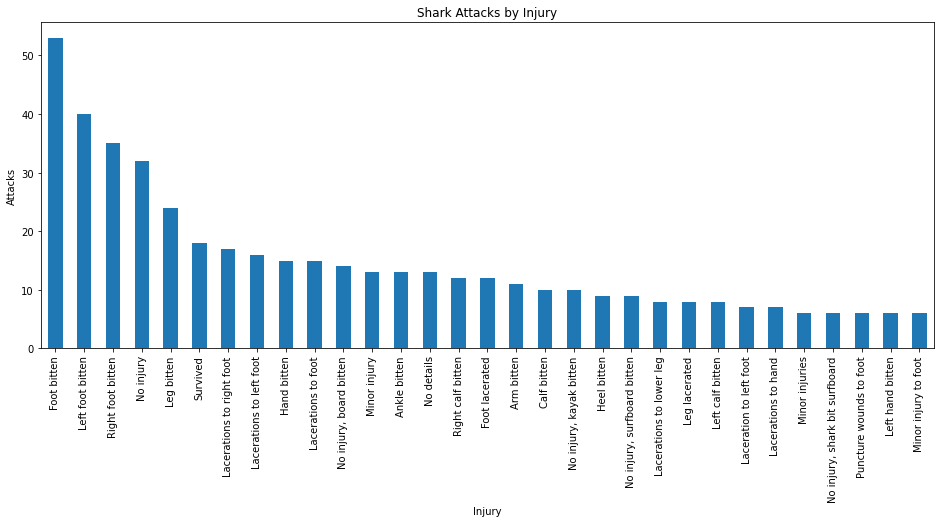

In [73]:
# What was the most common injury?

shark_injuries = shark_df['injury'].value_counts()


plt.figure(figsize = (16,6))
shark_injuries[(shark_injuries< 80) & (shark_injuries>5)].plot(kind = 'bar', title = 'Shark Attacks by Injury', xlabel = 'Injury', ylabel = 'Attacks')
plt.show()

# Bear Species?

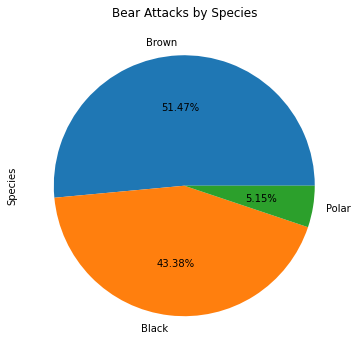

In [80]:
bear_species = bear_df['species'].value_counts()


plt.figure(figsize = (16,6))
bear_species.plot(kind = 'pie', title = 'Bear Attacks by Species', ylabel = 'Species',autopct='%.2f%%')
plt.show()

# Q5. Checkout the age and gender of the victims to discover any patterns?

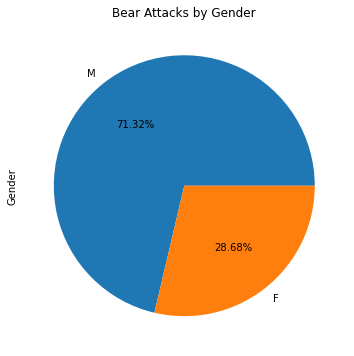

In [85]:
bear_attacks_gender = bear_df['sex'].value_counts()


plt.figure(figsize = (16,6))
bear_attacks_gender.plot(kind = 'pie', title = 'Bear Attacks by Gender', ylabel = 'Gender',autopct='%.2f%%')
plt.show()

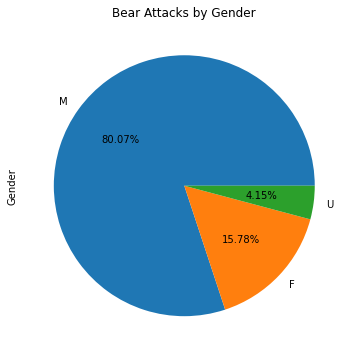

In [86]:
shark_attacks_gender = shark_df['sex'].value_counts()


plt.figure(figsize = (16,6))
shark_attacks_gender.plot(kind = 'pie', title = 'Bear Attacks by Gender', ylabel = 'Gender',autopct='%.2f%%')
plt.show()